<ipython-input-1-1f3502399467>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


curb-weight     1.428004
horsepower      0.851876
length          0.583497
fuel-system     0.476611
height          0.349480
symboling       0.229149
peak-rpm        0.173952
body-style      0.069007
num-of-doors    0.007092
Name: Ml Score, dtype: float64
Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


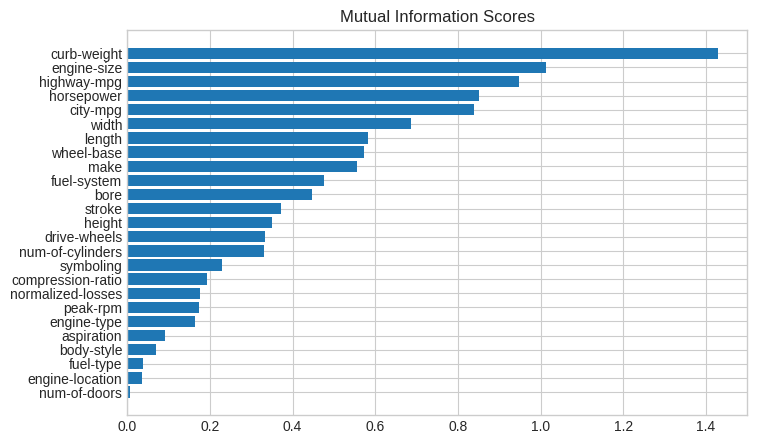

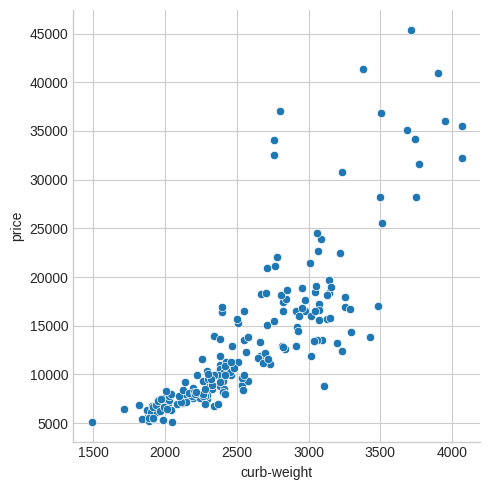

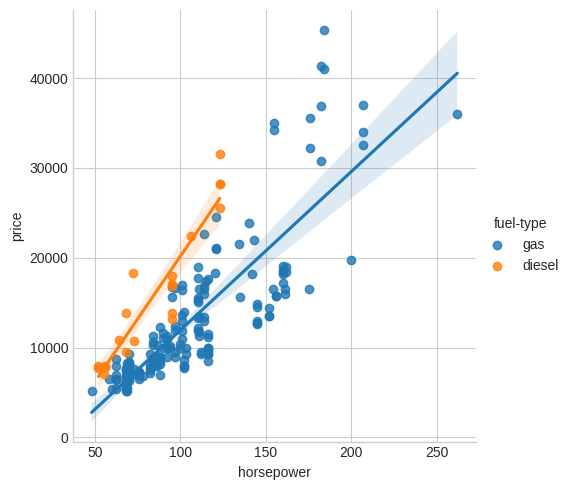

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

# 🔹 Load dataset & handle missing values
ds = pd.read_csv('/kaggle/input/automobile-dataset/Automobile_data.csv', na_values='?')

# 🔹 Drop rows with missing target values
ds.dropna(subset=["price"], inplace=True)

# 🔹 Fill missing values (for numeric columns)
ds.fillna(ds.mean(numeric_only=True), inplace=True)

# 🔹 Select features
X_features = ds.copy()
y = X_features.pop("price")

# 🔹 Encode categorical features
for colname in X_features.select_dtypes("object"):
    X_features[colname], _ = X_features[colname].factorize()

# 🔹 Ensure discrete features are boolean array
disc_feat = X_features.dtypes == int
disc_feat = disc_feat.values  # Convert to numpy array for sklearn compatibility

# 🔹 Define function for Mutual Information Score
def make_mutual_learning_score(X_features, y, disc_feat):
    mutual_info_score = mutual_info_regression(X_features, y, discrete_features=disc_feat)
    mutual_info_score = pd.Series(mutual_info_score, name='Ml Score', index=X_features.columns)
    mutual_info_score = mutual_info_score.sort_values(ascending=False)
    return mutual_info_score

# 🔹 Compute Mutual Information Scores
mutual_info_score = make_mutual_learning_score(X_features, y, disc_feat)

# 🔹 Display every 3rd feature
print(mutual_info_score[::3])

# 🔹 Visualization of Mutual Information Scores
def plot_mutual_info_score(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))  
    ticks = list(scores.index)  
    plt.barh(width, scores)  
    plt.yticks(width, ticks)  
    plt.title("Mutual Information Scores")  

plt.figure(dpi=100, figsize=(8, 5))  
plot_mutual_info_score(mutual_info_score)

# 🔹 Check actual column names to avoid errors
print(ds.columns)

# 🔹 Fix column names for plotting (if necessary)
if "curb_weight" not in ds.columns and "curb-weight" in ds.columns:
    curb_weight_col = "curb-weight"
else:
    curb_weight_col = "curb_weight"

if "horsepower" not in ds.columns and "horse-power" in ds.columns:
    horsepower_col = "horse-power"
else:
    horsepower_col = "horsepower"

if "fuel-type" in ds.columns:
    fuel_col = "fuel-type"
elif "type_of_fuel" in ds.columns:
    fuel_col = "type_of_fuel"
else:
    fuel_col = None  # No valid fuel column found

# 🔹 Ensure no missing values before plotting
ds.dropna(subset=[curb_weight_col, horsepower_col], inplace=True)

# 🔹 Corrected Visualizations
sns.relplot(x=curb_weight_col, y="price", data=ds)

if fuel_col:
    sns.lmplot(x=horsepower_col, y="price", hue=fuel_col, data=ds)
else:
    print("⚠️ No valid fuel column found, skipping lmplot.")
